# PANDAS INSURANCE CLAIMS CASE STUDY

### IMPROTING LIBRARIES

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from statistics import mode

## IMPORTING DATASETS

## Q1. 
Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims = pd.read_csv('C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/FOUNDATION/5. Pandas Case Study 3 - Insurance Claims Case Study/5. Pandas Case Study 3 - Insurance Claims Case Study/claims.csv')
customers = pd.read_csv('C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/FOUNDATION/5. Pandas Case Study 3 - Insurance Claims Case Study/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

In [3]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [4]:
customers.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


### JOINING THE DATASETS TO GET A 360 VIEW OF THE DATA

In [4]:
insurance_data = pd.merge(left = customers, right = claims, how = 'right', left_on = 'CUST_ID', right_on = 'customer_id')
insurance_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [5]:
insurance_data.shape

(1100, 16)

## Q2.
Perform a data audit for the datatypes and find out if there are any
mismatch within the current datatypes of the columns and their
business significance.

In [6]:
insurance_data.dtypes

CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [7]:
# CHANGING DATATYPES OF MISMATCHED VARIABLES
insurance_data['CUST_ID'] = insurance_data['CUST_ID'].astype('object')
insurance_data['claim_id'] = insurance_data['claim_id'].astype('object')
insurance_data['customer_id'] = insurance_data['customer_id'].astype('object')

In [8]:
# CHANGING DATATYPE OF DATEOFBIRTH TO PROPER FORMAT AND FURTHER CORRECTING YEARS < 1970
insurance_data['DateOfBirth'] = pd.to_datetime(insurance_data['DateOfBirth'], format = '%d-%b-%y')
insurance_data['DateOfBirth'] = np.where(pd.DatetimeIndex(insurance_data['DateOfBirth']).year > dt.datetime.now().year, 
                                         insurance_data['DateOfBirth'] + pd.DateOffset(years = -100),
                                         insurance_data['DateOfBirth'])

In [9]:
# CHANGING DATATYPE OF CLAIM_DATE TO PROPER FORMAT AND FURTHER CORRECTING YEARS < 1970
insurance_data['claim_date'] = pd.to_datetime(insurance_data['claim_date'], format = '%m/%d/%Y')
insurance_data['claim_date'] = np.where(pd.DatetimeIndex(insurance_data['claim_date']).year > dt.datetime.now().year, 
                                         insurance_data['claim_date'] + pd.DateOffset(years = -100),
                                         insurance_data['claim_date'])

In [10]:
insurance_data.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,2.18686e+07,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,7.57404e+07,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,3.03084e+07,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,3.03084e+07,Female,1984-03-11,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,4.78305e+07,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No


## Q3. 
Convert the column claim_amount to numeric. Use the appropriate
modules/attributes to remove the $ sign.

In [11]:
insurance_data['claim_amount'] = insurance_data['claim_amount'].str.replace('$', '')
insurance_data['claim_amount'] = insurance_data['claim_amount'].astype('float64')
insurance_data['claim_amount']

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1095     3059.0
1096     1520.0
1097    23575.0
1098    25120.0
1099    36685.0
Name: claim_amount, Length: 1100, dtype: float64

## Q4. 
Of all the injury claims, some of them have gone unreported with the
police. Create an alert flag (1,0) for all such claims.

In [12]:
# FLAG IS 1 (INDICATES ALERT) WHENEVER INJURY CLAIMS ARE NOT REPORTED TO POLICE OR STATUS IN UNKNOWN, ELSE FLAG IS 0

insurance_data['police_report_flag'] = np.where((insurance_data['claim_type'] == 'Injury only') |
                                                (insurance_data['claim_type'] == 'Material and injury') &
                                                ((insurance_data['police_report'] == 'No') | 
                                                 (insurance_data['police_report'] == 'Unknown')), 1, 0)
insurance_data['police_report_flag']

0       0
1       0
2       0
3       0
4       0
       ..
1095    0
1096    0
1097    1
1098    1
1099    0
Name: police_report_flag, Length: 1100, dtype: int32

## Q5. 
One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID
should remain unique.
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.

In [13]:
insurance_data.sort_values(by = 'claim_date', ascending = False, inplace = True)

In [14]:
insurance_data.drop_duplicates(subset = ['customer_id'], keep = 'first', inplace = True)

In [15]:
insurance_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,police_report_flag
1055,5.84515e+07,Male,1968-04-22,FL,673-574-7823,Gold,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0
286,9.39154e+07,Male,1967-09-08,ME,134-785-1687,Gold,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,1
697,8.64917e+07,Female,1997-01-29,IL,294-187-3286,Gold,32178193,86491727,Driver error,2018-10-30,Home,Unknown,Material only,1860.0,1.0,No,0
354,3.80111e+07,Female,1976-05-20,NE,271-123-1475,Gold,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0
1077,6.52088e+07,Male,1964-04-22,VA,286-128-6132,Platinum,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,0


In [16]:
insurance_data.shape

(1093, 17)

## Q6.
Check for missing values and impute the missing values with an
appropriate value. (mean for continuous and mode for categorical)

In [17]:
insurance_data.isna().sum()

CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
police_report_flag      0
dtype: int64

In [28]:
insurance_data.claim_amount.fillna(value = np.mean(insurance_data.claim_amount), inplace = True)

In [29]:
insurance_data.total_policy_claims.fillna(value = mode(insurance_data.total_policy_claims), inplace = True)

In [30]:
# CANNOT IMPUTE MISSING CUSTOMER DEMOGRAPHICS DATA, THIS MISSING DATA CAN EITHER BE BECAUSE OF SOME TECHNICAL ERROR OR IT CAN 
# BE BECAUSE OF FRAUDULENT CLAIMS (CLAIMS BY PEOPLE THAT WERE NOT OUR CUSTOMERS)

In [31]:
insurance_data.isna().sum()

CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims     0
fraudulent              0
police_report_flag      0
dtype: int64

## Q7. 
Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria:

Children < 18,
Youth 18-30, 
Adult 30-60, 
Senior > 60

In [32]:
insurance_data['age_category'] = np.where((pd.Timestamp.today().year - pd.DatetimeIndex(insurance_data.DateOfBirth).year) > 60, 'Senior',
                                         np.where((pd.Timestamp.today().year - pd.DatetimeIndex(insurance_data.DateOfBirth).year) > 30, 'Adult', 
                                                 np.where((pd.Timestamp.today().year - pd.DatetimeIndex(insurance_data.DateOfBirth).year) > 18, 'Youth', 'Children')))

In [33]:
insurance_data['age_category']

1055    Adult
286     Adult
697     Youth
354     Adult
1077    Adult
        ...  
120     Adult
383     Adult
581     Adult
231     Youth
905     Youth
Name: age_category, Length: 1093, dtype: object

In [40]:
insurance_data.tail(10)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,police_report_flag,age_category
739,2.9324e+07,Male,1971-03-03,NE,783-653-9163,Gold,58878919,29323970,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1.0,Yes,0,Adult
195,6.48405e+07,Female,1974-02-14,NM,918-174-7461,Silver,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,1,Adult
177,7.41553e+07,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0,Adult
181,6.17458e+07,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,1,Youth
312,6.51761e+07,Male,1975-11-23,NC,651-379-2486,Silver,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,1,Adult
120,3.95878e+07,Male,1965-01-10,LA,615-154-3516,Gold,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,0,Adult
383,2.56348e+07,Female,1974-11-04,KS,724-781-3692,Platinum,36457152,25634799,Driver error,2017-01-01,Auto,No,Material only,2900.0,2.0,No,0,Adult
581,9.75147e+07,Male,1969-06-08,FL,641-684-7986,Platinum,97666948,97514724,Driver error,2017-01-01,Home,No,Injury only,19120.0,1.0,No,1,Adult
231,7.72197e+07,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,1,Youth
905,4.26646e+07,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,1,Youth


## Q8.
What is the average amount claimed by the customers from various segments?

In [41]:
insurance_data.groupby('Segment').claim_amount.mean()

Segment
Gold        12844.844985
Platinum    12370.565077
Silver      12265.736955
Name: claim_amount, dtype: float64

## Q9.
What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.

In [42]:
q9_date = pd.to_datetime('1 October 2018', format = '%d %B %Y') + pd.DateOffset(days = -20)

In [43]:
q9_date

Timestamp('2018-09-11 00:00:00')

In [44]:
insurance_data[insurance_data['claim_date'] < q9_date].groupby('incident_cause').claim_amount.sum()

incident_cause
Crime                 7.269595e+05
Driver error          3.344546e+06
Natural causes        1.315301e+06
Other causes          3.778023e+06
Other driver error    3.342803e+06
Name: claim_amount, dtype: float64

## Q10.
How many adults from TX, DE and AK claimed insurance for driver
related issues and causes?

In [45]:
insurance_data[((insurance_data['State'] == 'TX') | 
                (insurance_data['State'] == 'DE') | 
                (insurance_data['State'] == 'AK')) & 
               ((insurance_data['incident_cause'] == 'Driver error') |
                (insurance_data['incident_cause'] == 'Other driver error')) &
                (insurance_data['age_category'] == 'Adult')].shape[0]

29

## Q11.
Draw a pie chart between the aggregated value of claim amount based
on gender and segment. Represent the claim amount as a percentage on
the pie chart.

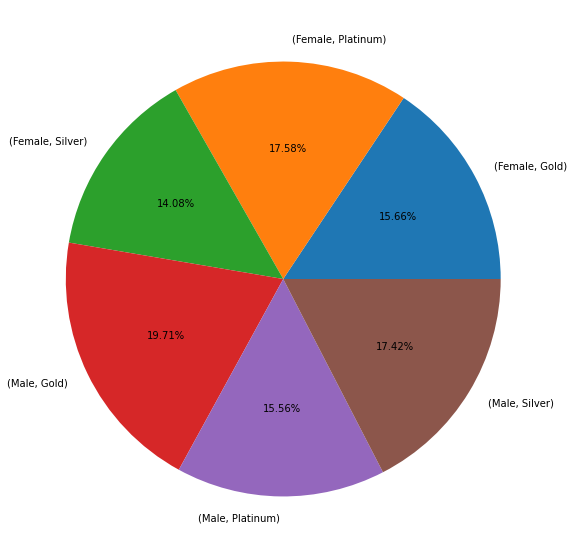

In [46]:
(insurance_data.groupby(['gender', 'Segment']).claim_amount.sum()).plot(kind = 'pie', autopct = '%1.2f%%', figsize = (10, 10))
plt.ylabel('')
plt.show()

## Q12.
Among males and females, which gender had claimed the most for any
type of driver related issues? E.g. This metric can be compared using a
bar chart

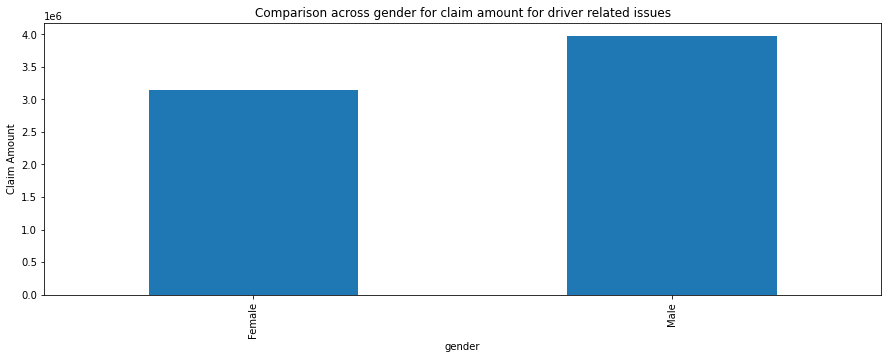

In [47]:
(insurance_data[(insurance_data['incident_cause'] == 'Driver error') |
                (insurance_data['incident_cause'] == 'Other driver error')].groupby('gender').claim_amount.sum()).plot(kind = 'bar', figsize = (15, 5))
plt.title('Comparison across gender for claim amount for driver related issues')
plt.ylabel('Claim Amount')
plt.show()

## Q13.
Which age group had the maximum fraudulent policy claims? Visualize
it on a bar chart.

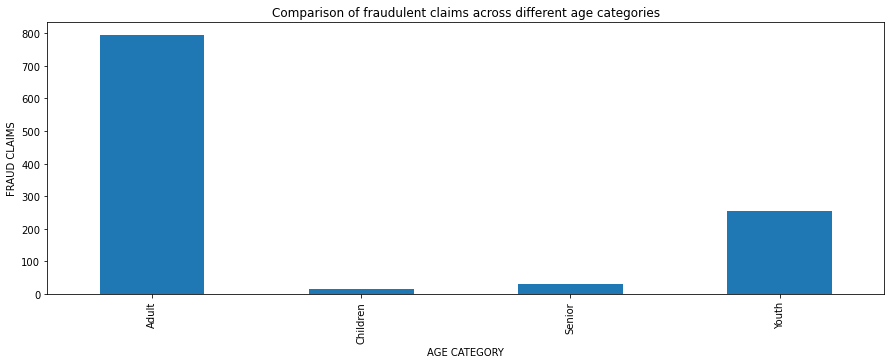

In [48]:
(insurance_data.groupby('age_category').fraudulent.count()).plot(kind = 'bar', figsize = (15, 5))
plt.title('Comparison of fraudulent claims across different age categories')
plt.xlabel('AGE CATEGORY')
plt.ylabel('FRAUD CLAIMS')
plt.show()

## Q14.
Visualize the monthly trend of the total amount that has been claimed
by the customers. Ensure that on the “month” axis, the month is in a
chronological order not alphabetical order.

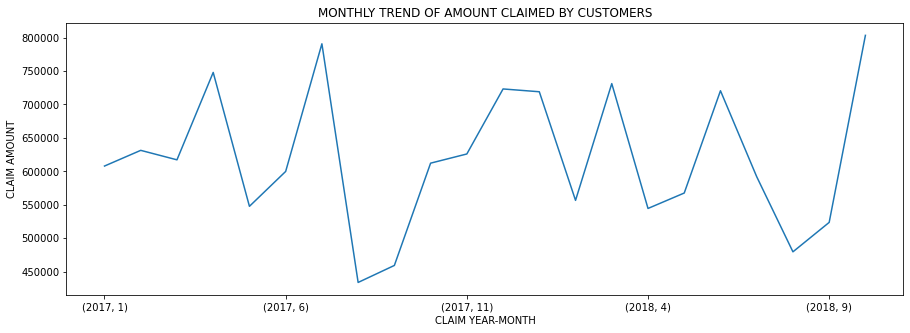

In [49]:
(insurance_data.groupby([pd.DatetimeIndex(insurance_data.claim_date).year, pd.DatetimeIndex(insurance_data.claim_date).month]).claim_amount.sum()).plot(kind = 'line', figsize = (15, 5))
plt.title('MONTHLY TREND OF AMOUNT CLAIMED BY CUSTOMERS')
plt.xlabel('CLAIM YEAR-MONTH')
plt.ylabel('CLAIM AMOUNT')
plt.show()

## Q15.
What is the average claim amount for gender and age categories and
suitably represent the above using a facetted bar chart, one facet that
represents fraudulent claims and the other for non-fraudulent claims.

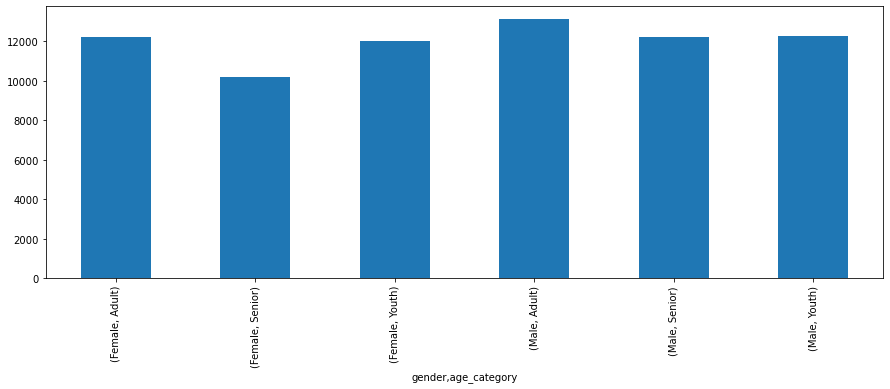

In [50]:
(insurance_data.groupby(['gender', 'age_category']).claim_amount.mean()).plot(kind = 'bar', figsize = (15, 5))
plt.show()

In [51]:
(insurance_data.groupby(['gender', 'age_category', 'fraudulent'])[['claim_amount']].agg('mean')).reset_index()

,gender,age_category,fraudulent,claim_amount
0,Female,Adult,No,12169.914073
1,Female,Adult,Yes,12296.729136
2,Female,Senior,No,14938.999757
3,Female,Senior,Yes,2530.000000
4,Female,Youth,No,12852.014539
5,Female,Youth,Yes,8279.187419
6,Male,Adult,No,12384.288855
7,Male,Adult,Yes,15600.641278
8,Male,Senior,No,11143.333333
9,Male,Senior,Yes,20165.250000


In [52]:
{'claim_amount':'mean', 'fraudulent':'count'}

{'claim_amount': 'mean', 'fraudulent': 'count'}

## STATISTICS PART

In [53]:
import scipy.stats as stats

## Q16. 
Is there any similarity in the amount claimed by males and females?

In [54]:
claim_male = insurance_data.loc[insurance_data['gender'] == 'Male', 'claim_amount']
claim_female = insurance_data.loc[insurance_data['gender'] == 'Female', 'claim_amount']

In [55]:
print('Mean of claim amount by males :', claim_male.mean(), '| Mean of claim amount by females :', claim_female.mean())

Mean of claim amount by males : 12883.131547169276 | Mean of claim amount by females : 12099.717240787364


### Ho : Average claim amount by males = Average claim amount by females
### Ha : Average claim amount by males <> Average claim amount by females
### CI : 95%, p-value : 0.05
### Independent Sample t-test

In [56]:
stats.ttest_ind(claim_male, claim_female)

Ttest_indResult(statistic=0.9621769389700356, pvalue=0.33617690369982145)

### Conclusion :
Since p-value is coming out to be very high, we fail to reject the null hypothesis.

In other words we can say, there is a similarity in the amount claimed by males and females.

## Q17. 
Is there any relationship between age category and segment?

In [57]:
obs = pd.crosstab(insurance_data['age_category'], insurance_data['Segment'])
obs.index.name = ''
obs.columns.name = ''
obs

,Gold,Platinum,Silver
,,,
Adult,284,258,252
Senior,6,15,9
Youth,81,88,85


### Ho : There is no relationship between age category and segment
### Ha : There is a relationship between age category and segment
### CI : 95%, p-value : 0.05
### chi-square test

In [58]:
stats.chi2_contingency(obs)[:3]

(5.703980163471301, 0.22237276966956043, 4)

### Conclusion :
Since p-value is coming out to be high(> 0.05), we fail to reject the null hypothesis.

In other words, we cannot say that there is a relationship between age category and segment.

## Q18. 
The current year has shown a significant rise in claim amounts as
compared to 2016-17 fiscal average which was $10,000.

In [62]:
print('Averege claim amount for fiscal year 2017-2018 : ', insurance_data.claim_amount.mean())

Averege claim amount for fiscal year 2017-2018 :  12475.499513618675


### Ho : Average claim amount for fiscal year 2017-2018 = 10,000
### Ha : Average claim amount for fiscal year 2017-2018 != 10,000
### CI : 95%, p-value : 0.05
### One Sample t-test

In [64]:
stats.ttest_1samp(insurance_data.claim_amount, 10000)

Ttest_1sampResult(statistic=6.1294570291875985, pvalue=1.2298028517276338e-09)

### Conclusion :
Since p-value is coming out to be lower than 0.05, we can reject the null hypothesis.
In other words we can say that average claim amount for fiscal year 2017-2018 has shown significant increase from previous year's average of 10,000.

## Q19. 
Is there any difference between age groups and insurance claims?

In [45]:
claim_adult = insurance_data.loc[insurance_data['age_category'] == 'Adult', 'claim_amount']
claim_youth = insurance_data.loc[insurance_data['age_category'] == 'Youth', 'claim_amount']
claim_senior = insurance_data.loc[insurance_data['age_category'] == 'Senior', 'claim_amount']

In [46]:
print('Mean of claim amount by Adults :', claim_adult.mean(), '\nMean of claim amount by Youth :', claim_youth.mean(), '\nMean of claim amount by Seniors :', claim_senior.mean())

Mean of claim amount by Adults : 12669.23015347088 
Mean of claim amount by Youth : 12117.1066062448 
Mean of claim amount by Seniors : 11324.913540638367


### Ho : Average claim amount of adults = Average claim amount of youth = Average claim amount of seniors 
### Ha : Average claim amount of adults != Average claim amount of youth != Average claim amount of seniors
### CI : 95%, p-value : 0.05
### ANOVA/f-test

In [47]:
stats.f_oneway(claim_adult, claim_youth, claim_senior)

F_onewayResult(statistic=0.28355646713450794, pvalue=0.7531569057195997)

### Conclusion :
Since p-value is very high, we fail to reject the null hypothesis.

In other words, we cannot say that there is a difference among age groups and amounts claimed by them.

## Q20.
Is there any relationship between total number of policy claims and the
claimed amount?

### Ho : There is no relationship between total policy claims and claimed amount
### Ha : There is a relationship between total policy claims and claimed amount
### CI : 95%, p-value : 0.05
### Pearson Correlation

In [48]:
stats.pearsonr(insurance_data['total_policy_claims'], insurance_data['claim_amount'])

(-0.022401566777628827, 0.4624932766041524)

### Conclusion :
Since p-value is coming out to be very low, we fail to reject the null hypothesis.

In other words, we cannot say there is a relationship between total policy claims and claimed amount (evident from low correlation value of -0.02 also)